In [1]:
reset -fs

In [15]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# modeling imports
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
# maybe
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [3]:
# %matplotlib inline
# %config InlineBackend.figure_formats = ['retina']

In [4]:
obs = pd.read_csv('path_obs_clean_2021.csv')

/Users/noether/miniforge3/envs/eclipse/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3251: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
target = obs.CLEAR.value_counts(normalize=True)
print(target)
# target.plot(kind='bar')

False    0.56784
True     0.43216
Name: CLEAR, dtype: float64


In [44]:
altse_rh_wind_dir = train_test_split(obs[['ALTSE','RH','WIND_DIR',]], obs.iloc[:, -1],
                                     test_size = 0.2, random_state=42)

altse_rh_wind_dir_lat = train_test_split(obs[['ALTSE','RH','WIND_DIR','LATITUDE']], obs.iloc[:, -1],
                                         test_size = 0.2, random_state=42)

altse_rh_wind_dir_lat_elev_pcp = train_test_split(obs[['DP','ALTSE','RH','WIND_DIR','LATITUDE','ELEVATION','PCP']],
                                                  obs.iloc[:, -1], 
                                                  test_size = 0.2, random_state=42)

all_var = train_test_split(obs.iloc[:,5:18], obs.iloc[:, -1],
                           test_size = 0.2, random_state=42)

LogisticRegression(max_iter=10000) Classification Report
Training Score: 0.6615127158688139
Test Score: 0.6607331810026223
              precision    recall  f1-score   support

       False       0.68      0.76      0.72    296608
        True       0.63      0.53      0.57    225064

    accuracy                           0.66    521672
   macro avg       0.65      0.64      0.65    521672
weighted avg       0.66      0.66      0.66    521672

KNeighborsClassifier() Classification Report
Training Score: 0.8707863768543775
Test Score: 0.8048735603981045
              precision    recall  f1-score   support

       False       0.82      0.84      0.83    296608
        True       0.78      0.76      0.77    225064

    accuracy                           0.80    521672
   macro avg       0.80      0.80      0.80    521672
weighted avg       0.80      0.80      0.80    521672

SGDClassifier() Classification Report
Training Score: 0.6600860504034152
Test Score: 0.6595696146237483
        

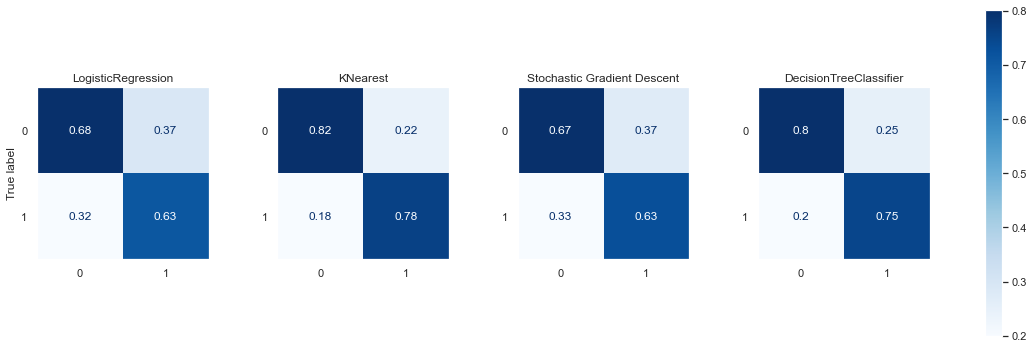

In [57]:
# ALTSE, RH, WIND_DIR, LATITUDE, ELEVATION, PCP comparison

classifiers = {
#    "Naive Bayes": GaussianNB(),
    "LogisticRegression": LogisticRegression(max_iter = 10000),
    "KNearest": KNeighborsClassifier(),
    "Stochastic Gradient Descent": SGDClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
}


X_train, X_test, y_train, y_test = altse_rh_wind_dir_lat_elev_pcp

std_scale = StandardScaler()

X_train_scaled = std_scale.fit_transform(X_train)
X_test_scaled = std_scale.fit_transform(X_test)

fig, axes = plt.subplots(1, 4, figsize=(20, 6))



for i, (key, classifier) in enumerate(classifiers.items()):
    y_predict_test = classifier.fit(X_train_scaled, y_train).predict(X_test_scaled)
    cf_matrix_test = confusion_matrix(y_test, y_predict_test, normalize='pred')
    print(f'{classifier} Classification Report')
    print(f'Training Score: {classifier.score(X_train_scaled, y_train)}')
    print(f'Test Score: {classifier.score(X_test_scaled, y_test)}')
    print(classification_report(y_test, y_predict_test))
    disp = ConfusionMatrixDisplay(cf_matrix_test)
    disp.plot(ax=axes[i], cmap=plt.cm.Blues)
    disp.ax_.set_title(key)

    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')


plt.subplots_adjust(wspace=0.40, hspace=0.1)


fig.colorbar(disp.im_, ax=axes)

plt.show()


0.6873043546603127
              precision    recall  f1-score   support

       False       0.72      0.75      0.73   1184520
        True       0.65      0.61      0.63    902164

    accuracy                           0.69   2086684
   macro avg       0.68      0.68      0.68   2086684
weighted avg       0.69      0.69      0.69   2086684

0.6457544204020917
              precision    recall  f1-score   support

       False       0.68      0.71      0.70    296608
        True       0.59      0.56      0.58    225064

    accuracy                           0.65    521672
   macro avg       0.64      0.64      0.64    521672
weighted avg       0.64      0.65      0.64    521672



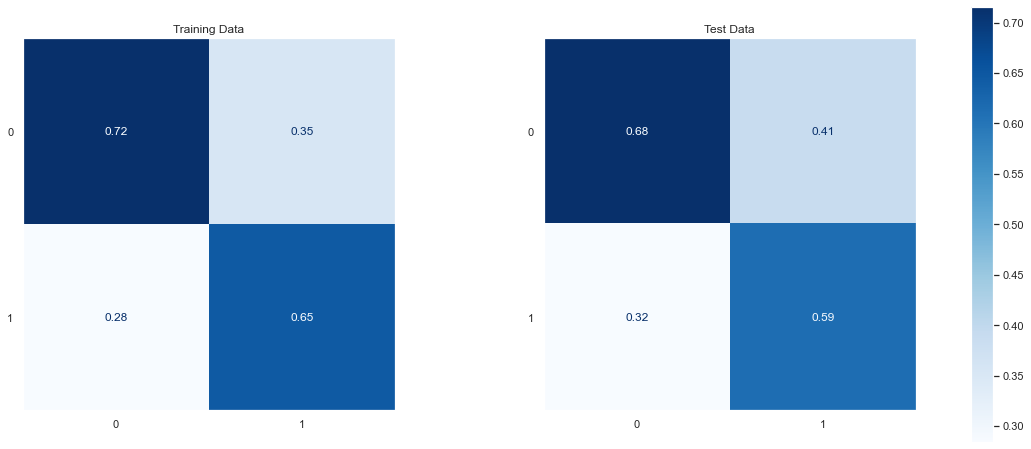

In [42]:
# ALTSE, RH, WIND_DIR with KNN Classifier

classifier = KNeighborsClassifier()
X_train, X_test, y_train, y_test = altse_rh_wind_dir

std_scale = StandardScaler()

X_train_scaled = std_scale.fit_transform(X_train)
X_test_scaled = std_scale.fit_transform(X_test)

y_predict_train = classifier.fit(X_train_scaled, y_train).predict(X_train_scaled)
y_predict_test = classifier.fit(X_train_scaled, y_train).predict(X_test_scaled)

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    
    
cf_matrix_train = confusion_matrix(y_train, y_predict_train, normalize='pred')
print(classifier.score(X_train_scaled, y_train))
print(classification_report(y_train, y_predict_train))

cf_matrix_test = confusion_matrix(y_test, y_predict_test, normalize='pred')
print(classifier.score(X_test_scaled, y_test))
print(classification_report(y_test, y_predict_test))
   
disp_train = ConfusionMatrixDisplay(cf_matrix_train)
disp_train.plot(ax=axes[0], cmap=plt.cm.Blues)
disp_train.ax_.set_title('Training Data')

disp_train.im_.colorbar.remove()
disp_train.ax_.set_xlabel('')
disp_train.ax_.set_ylabel('')

disp_test = ConfusionMatrixDisplay(cf_matrix_test)
disp_test.plot(ax=axes[1], cmap=plt.cm.Blues)
disp_test.ax_.set_title('Test Data')

disp_test.im_.colorbar.remove()
disp_test.ax_.set_xlabel('')
disp_test.ax_.set_ylabel('')

plt.subplots_adjust(wspace=0.40, hspace=0.1)


fig.colorbar(disp_train.im_, ax=axes)

plt.show()



0.7203649426554284
              precision    recall  f1-score   support

       False       0.73      0.80      0.76   1184520
        True       0.70      0.62      0.66    902164

    accuracy                           0.72   2086684
   macro avg       0.72      0.71      0.71   2086684
weighted avg       0.72      0.72      0.72   2086684

0.6626309251790397
              precision    recall  f1-score   support

       False       0.69      0.75      0.72    296608
        True       0.62      0.55      0.59    225064

    accuracy                           0.66    521672
   macro avg       0.66      0.65      0.65    521672
weighted avg       0.66      0.66      0.66    521672



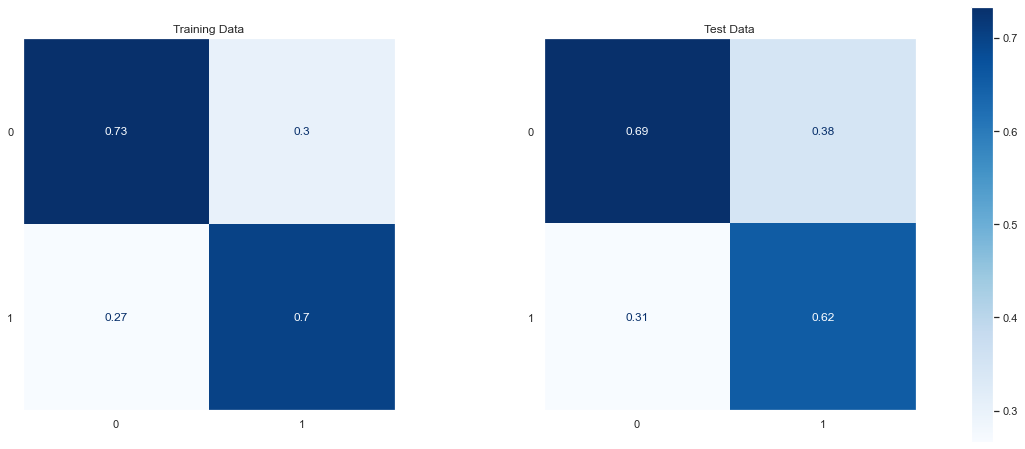

In [45]:
# ALTSE, RH, WIND_DIR with Decision Tree Classifier

classifier = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = altse_rh_wind_dir

std_scale = StandardScaler()

X_train_scaled = std_scale.fit_transform(X_train)
X_test_scaled = std_scale.fit_transform(X_test)

y_predict_train = classifier.fit(X_train_scaled, y_train).predict(X_train_scaled)
y_predict_test = classifier.fit(X_train_scaled, y_train).predict(X_test_scaled)

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    
    
cf_matrix_train = confusion_matrix(y_train, y_predict_train, normalize='pred')
print(classifier.score(X_train_scaled, y_train))
print(classification_report(y_train, y_predict_train))

cf_matrix_test = confusion_matrix(y_test, y_predict_test, normalize='pred')
print(classifier.score(X_test_scaled, y_test))
print(classification_report(y_test, y_predict_test))
   
disp_train = ConfusionMatrixDisplay(cf_matrix_train)
disp_train.plot(ax=axes[0], cmap=plt.cm.Blues)
disp_train.ax_.set_title('Training Data')

disp_train.im_.colorbar.remove()
disp_train.ax_.set_xlabel('')
disp_train.ax_.set_ylabel('')

disp_test = ConfusionMatrixDisplay(cf_matrix_test)
disp_test.plot(ax=axes[1], cmap=plt.cm.Blues)
disp_test.ax_.set_title('Test Data')

disp_test.im_.colorbar.remove()
disp_test.ax_.set_xlabel('')
disp_test.ax_.set_ylabel('')

plt.subplots_adjust(wspace=0.40, hspace=0.1)


fig.colorbar(disp_train.im_, ax=axes)

plt.show()




0.652733236081745
              precision    recall  f1-score   support

       False       0.65      0.83      0.73   1184520
        True       0.65      0.42      0.51    902164

    accuracy                           0.65   2086684
   macro avg       0.65      0.63      0.62   2086684
weighted avg       0.65      0.65      0.64   2086684

0.6517754451072705
              precision    recall  f1-score   support

       False       0.65      0.83      0.73    296608
        True       0.65      0.42      0.51    225064

    accuracy                           0.65    521672
   macro avg       0.65      0.62      0.62    521672
weighted avg       0.65      0.65      0.64    521672



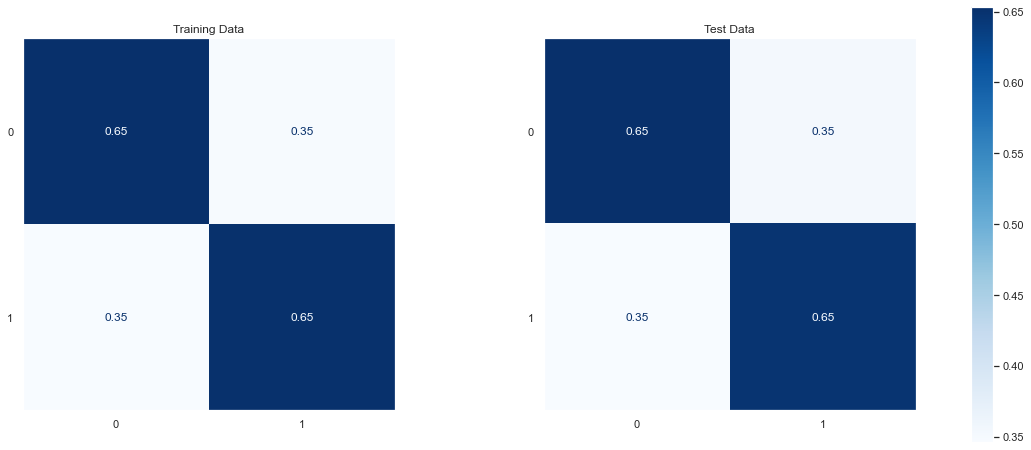

In [49]:
# ALTSE, RH, WIND_DIR with Random Forest Classifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
X_train, X_test, y_train, y_test = altse_rh_wind_dir

std_scale = StandardScaler()

X_train_scaled = std_scale.fit_transform(X_train)
X_test_scaled = std_scale.fit_transform(X_test)

y_predict_train = classifier.fit(X_train_scaled, y_train).predict(X_train_scaled)
y_predict_test = classifier.fit(X_train_scaled, y_train).predict(X_test_scaled)

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    
    
cf_matrix_train = confusion_matrix(y_train, y_predict_train, normalize='pred')
print(classifier.score(X_train_scaled, y_train))
print(classification_report(y_train, y_predict_train))

cf_matrix_test = confusion_matrix(y_test, y_predict_test, normalize='pred')
print(classifier.score(X_test_scaled, y_test))
print(classification_report(y_test, y_predict_test))
   
disp_train = ConfusionMatrixDisplay(cf_matrix_train)
disp_train.plot(ax=axes[0], cmap=plt.cm.Blues)
disp_train.ax_.set_title('Training Data')

disp_train.im_.colorbar.remove()
disp_train.ax_.set_xlabel('')
disp_train.ax_.set_ylabel('')

disp_test = ConfusionMatrixDisplay(cf_matrix_test)
disp_test.plot(ax=axes[1], cmap=plt.cm.Blues)
disp_test.ax_.set_title('Test Data')

disp_test.im_.colorbar.remove()
disp_test.ax_.set_xlabel('')
disp_test.ax_.set_ylabel('')

plt.subplots_adjust(wspace=0.40, hspace=0.1)


fig.colorbar(disp_train.im_, ax=axes)

plt.show()




0.6532910589241112
              precision    recall  f1-score   support

       False       0.67      0.76      0.71   1184520
        True       0.62      0.52      0.56    902164

    accuracy                           0.66   2086684
   macro avg       0.65      0.64      0.64   2086684
weighted avg       0.65      0.66      0.65   2086684

0.6526783112760508
              precision    recall  f1-score   support

       False       0.66      0.80      0.72    296608
        True       0.63      0.46      0.53    225064

    accuracy                           0.65    521672
   macro avg       0.65      0.63      0.63    521672
weighted avg       0.65      0.65      0.64    521672



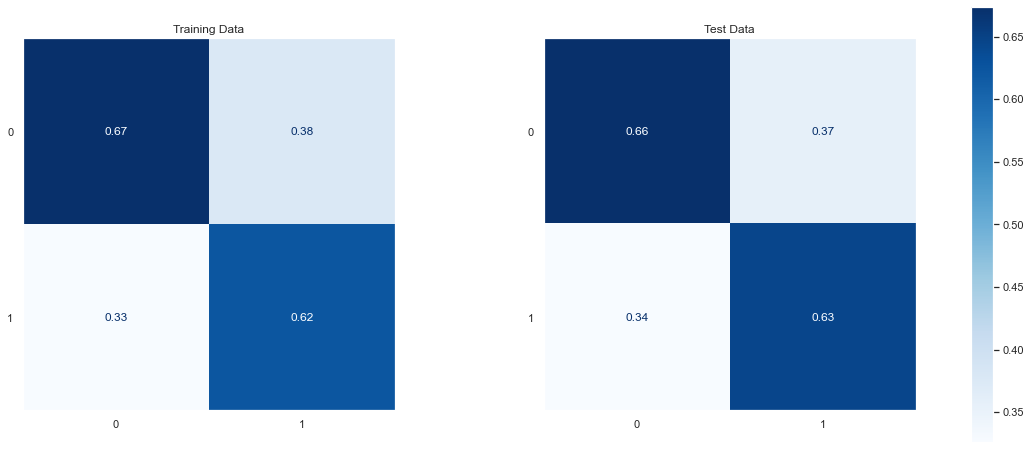

In [47]:
# ALTSE, RH, WIND_DIR with SGD Classifier

classifier = SGDClassifier()
X_train, X_test, y_train, y_test = altse_rh_wind_dir

std_scale = StandardScaler()

X_train_scaled = std_scale.fit_transform(X_train)
X_test_scaled = std_scale.fit_transform(X_test)

y_predict_train = classifier.fit(X_train_scaled, y_train).predict(X_train_scaled)
y_predict_test = classifier.fit(X_train_scaled, y_train).predict(X_test_scaled)

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    
    
cf_matrix_train = confusion_matrix(y_train, y_predict_train, normalize='pred')
print(classifier.score(X_train_scaled, y_train))
print(classification_report(y_train, y_predict_train))

cf_matrix_test = confusion_matrix(y_test, y_predict_test, normalize='pred')
print(classifier.score(X_test_scaled, y_test))
print(classification_report(y_test, y_predict_test))
   
disp_train = ConfusionMatrixDisplay(cf_matrix_train)
disp_train.plot(ax=axes[0], cmap=plt.cm.Blues)
disp_train.ax_.set_title('Training Data')

disp_train.im_.colorbar.remove()
disp_train.ax_.set_xlabel('')
disp_train.ax_.set_ylabel('')

disp_test = ConfusionMatrixDisplay(cf_matrix_test)
disp_test.plot(ax=axes[1], cmap=plt.cm.Blues)
disp_test.ax_.set_title('Test Data')

disp_test.im_.colorbar.remove()
disp_test.ax_.set_xlabel('')
disp_test.ax_.set_ylabel('')

plt.subplots_adjust(wspace=0.40, hspace=0.1)


fig.colorbar(disp_train.im_, ax=axes)

plt.show()





In [58]:
stations_hourly_obs = pd.read_csv('stations_hourly_clean_2021.csv')

In [59]:
stations_hourly_obs

,NAME,geometry,SKY,LATITUDE,LONGITUDE,ELEVATION,ALTSE,DP,TEMP,PCP,RH,STP,VIS,WB_TEMP,WIND_DIR,WIND,ZONE,MONTH,CLEAR,CLEAR_NEXTDAY
0,"LLANO MUNICIPAL AIRPORT, TX US",POINT (-98.66194 30.78361),FEW:02 15 SCT:04 22 OVC:08 26,30.78361,-98.66194,335.9,29.78,30.0,34.0,0.0,87.0,28.61,10.0,32.0,280.0,15.0,8a,1.0,0.0,0.0
1,"LLANO MUNICIPAL AIRPORT, TX US",POINT (-98.66194 30.78361),BKN:07 14 OVC:08 19,30.78361,-98.66194,335.9,29.81,30.0,34.0,0.0,87.0,28.64,10.0,32.0,270.0,14.0,8a,1.0,0.0,0.0
2,"LLANO MUNICIPAL AIRPORT, TX US",POINT (-98.66194 30.78361),BKN:07 13 OVC:08 17,30.78361,-98.66194,335.9,29.81,32.0,34.0,0.0,93.0,28.64,10.0,33.0,280.0,10.0,8a,1.0,0.0,0.0
3,"LLANO MUNICIPAL AIRPORT, TX US",POINT (-98.66194 30.78361),OVC:08 20,30.78361,-98.66194,335.9,29.83,32.0,36.0,0.0,87.0,28.66,10.0,34.0,270.0,9.0,8a,1.0,0.0,0.0
4,"LLANO MUNICIPAL AIRPORT, TX US",POINT (-98.66194 30.78361),OVC:08 35,30.78361,-98.66194,335.9,29.87,32.0,36.0,0.0,87.0,28.70,10.0,34.0,270.0,14.0,8a,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319922,"CARL R KELLER FIELD AIRPORT, OH US",POINT (-82.86948 41.51627),OVC:08 6,41.51627,-82.86948,179.8,29.87,36.0,37.0,0.0,93.0,29.24,3.0,37.0,0.0,3.0,6b,12.0,0.0,0.0
1319923,"CARL R KELLER FIELD AIRPORT, OH US",POINT (-82.86948 41.51627),OVC:08 5,41.51627,-82.86948,179.8,29.87,36.0,37.0,0.0,93.0,29.24,3.0,37.0,80.0,6.0,6b,12.0,0.0,1.0
1319924,"CARL R KELLER FIELD AIRPORT, OH US",POINT (-82.86948 41.51627),OVC:08 5,41.51627,-82.86948,179.8,29.87,36.0,37.0,0.0,93.0,29.24,3.0,37.0,50.0,5.0,6b,12.0,0.0,0.0
1319925,"CARL R KELLER FIELD AIRPORT, OH US",POINT (-82.86948 41.51627),OVC:08 4,41.51627,-82.86948,179.8,29.87,36.0,36.0,0.0,100.0,29.24,3.0,36.0,50.0,7.0,6b,12.0,0.0,0.0


In [ ]:
# ALTSE, RH, WIND_DIR
X_train, X_test, y_train, y_test = train_test_split(obs[['ALTSE','RH','WIND_DIR',]], obs.iloc[:, -1], 
                                                    test_size = 0.2, random_state=42)

std_scale = StandardScaler()

X_train_scaled = std_scale.fit_transform(X_train)
X_test_scaled = std_scale.fit_transform(X_test)

lm3 = LogisticRegression()

# ALTSE, RH, WIND_DIR - TRAIN
lm3.fit(X_train_scaled, y_train)

y_predict_train = lm3.predict(X_train_scaled) 
print(lm3.score(X_train_scaled, y_train))

# ALTSE, RH, WIND_DIR - TEST
y_predict_test = lm3.predict(X_test_scaled) 
print(lm3.score(X_test_scaled, y_test))

print(confusion_matrix(y_test, y_predict_test))
print(classification_report(y_test, y_predict_test))

cm = confusion_matrix(y_test, y_predict_test)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


In [ ]:
# ALTSE, RH, WIND_DIR, LATITUDE
X_train, X_test, y_train, y_test = train_test_split(obs[['ALTSE','RH','WIND_DIR','LATITUDE']], obs.iloc[:, -1], 
                                                    test_size = 0.2, random_state=42)

std_scale = StandardScaler()

X_train_scaled = std_scale.fit_transform(X_train)
X_test_scaled = std_scale.fit_transform(X_test)

lm3 = LogisticRegression()

# ALTSE, RH, WIND_DIR, LATITUDE - TRAIN
lm3.fit(X_train_scaled, y_train)

y_predict_train = lm3.predict(X_train_scaled) 
print(lm3.score(X_train_scaled, y_train))

# ALTSE, RH, WIND_DIR, LATITUDE - TEST
y_predict_test = lm3.predict(X_test_scaled) 
print(lm3.score(X_test_scaled, y_test))

print(confusion_matrix(y_test, y_predict_test))
print(classification_report(y_test, y_predict_test))

cm = confusion_matrix(y_test, y_predict_test)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


In [ ]:
# DP, ALTSE, RH, WIND_DIR, LATITUDE, ELEVATION, PCP
X_train, X_test, y_train, y_test = train_test_split(obs[['DP','ALTSE','RH','WIND_DIR','LATITUDE','ELEVATION','PCP']], obs.iloc[:, -1], 
                                                    test_size = 0.2, random_state=42)

std_scale = StandardScaler()

X_train_scaled = std_scale.fit_transform(X_train)
X_test_scaled = std_scale.fit_transform(X_test)

lm3 = LogisticRegression()

# DP, ALTSE, RH, WIND_DIR, LATITUDE, ELEVATION, PCP - TRAIN
lm3.fit(X_train_scaled, y_train)

y_predict_train = lm3.predict(X_train_scaled) 
print(lm3.score(X_train_scaled, y_train))

# DP, ALTSE, RH, WIND_DIR, LATITUDE, ELEVATION, PCP - TEST
y_predict_test = lm3.predict(X_test_scaled) 
print(lm3.score(X_test_scaled, y_test))

print(confusion_matrix(y_test, y_predict_test))
print(classification_report(y_test, y_predict_test))

cm = confusion_matrix(y_test, y_predict_test)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
# ALL (LR)
X_train, X_test, y_train, y_test = train_test_split(obs.iloc[:,5:18], obs.iloc[:, -1], 
                                                    test_size = 0.2, random_state=42)

std_scale = StandardScaler()

X_train_scaled = std_scale.fit_transform(X_train)
X_test_scaled = std_scale.fit_transform(X_test)

lm3 = LogisticRegression()

# ALL - TRAIN (LR)
lm3.fit(X_train_scaled, y_train)

y_predict_train = lm3.predict(X_train_scaled) 
print(lm3.score(X_train_scaled, y_train))

# ALL - TEST (LR)
y_predict_test = lm3.predict(X_test_scaled) 
print(lm3.score(X_test_scaled, y_test))

print(confusion_matrix(y_test, y_predict_test))
print(classification_report(y_test, y_predict_test))

cm = confusion_matrix(y_test, y_predict_test)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
# ALL (SGD)
X_train, X_test, y_train, y_test = train_test_split(obs.iloc[:,5:18], obs.iloc[:, -1], 
                                                    test_size = 0.2, random_state=42)

std_scale = StandardScaler()

X_train_scaled = std_scale.fit_transform(X_train)
X_test_scaled = std_scale.fit_transform(X_test)

sgd = SGDClassifier()

# ALL - TRAIN (SGD)
sgd.fit(X_train_scaled, y_train)

y_predict_train = sgd.predict(X_train_scaled) 
print(sgd.score(X_train_scaled, y_train))

# ALL - TEST (SGD)
y_predict_test = sgd.predict(X_test_scaled) 
print(sgd.score(X_test_scaled, y_test))

print(confusion_matrix(y_test, y_predict_test))
print(classification_report(y_test, y_predict_test))

cm = confusion_matrix(y_test, y_predict_test)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
# ALL (DTC)
X_train, X_test, y_train, y_test = train_test_split(obs.iloc[:,5:18], obs.iloc[:, -1], 
                                                    test_size = 0.2, random_state=42)

std_scale = StandardScaler()

X_train_scaled = std_scale.fit_transform(X_train)
X_test_scaled = std_scale.fit_transform(X_test)

dtc = DecisionTreeClassifier()

# ALL - TRAIN (DTC)
dtc.fit(X_train_scaled, y_train)

y_predict_train = dtc.predict(X_train_scaled) 
print(dtc.score(X_train_scaled, y_train))

# ALL - TEST (DTC)
y_predict_test = dtc.predict(X_test_scaled) 
print(dtc.score(X_test_scaled, y_test))

print(classification_report(y_test, y_predict_test))

cm_train = confusion_matrix(y_train, y_predict_train)
cm_test = confusion_matrix(y_test, y_predict_test)


fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_train)
ax.imshow(cm_test)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='blue')
plt.show()

print(confusion_matrix(y_test, y_predict_test))

In [ ]:
dtc = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
    random_state=0)
scores = cross_val_score(dtc, X, y, cv=5)
scores.mean()


clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()


clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean() > 0.999


In [ ]:
classifiers = {
#    "Naive Bayes": GaussianNB(),
#    "LogisticRegression": LogisticRegression(max_iter = 10000),
    "KNearest": KNeighborsClassifier(),
    "Stochastic Gradient Descent": SGDClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
}


X_train, X_test, y_train, y_test = train_test_split(obs.iloc[:,5:18], obs.iloc[:, -1], 
                                                    test_size = 0.2, random_state=42)

std_scale = StandardScaler()

X_train_scaled = std_scale.fit_transform(X_train)
X_test_scaled = std_scale.fit_transform(X_test)


f, axes = plt.subplots(2, 2, figsize=(20, 20), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(X_train_scaled, y_train).predict(X_test_scaled)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)


f.colorbar(disp.im_, ax=axes)
plt.show()


KeyError: "None of [Int64Index([ 348985,  348986,  348987,  348988,  348989,  348990,  348991,\n             348992,  348993,  348994,\n            ...\n            2608346, 2608347, 2608348, 2608349, 2608350, 2608351, 2608352,\n            2608353, 2608354, 2608355],\n           dtype='int64', length=2173630)] are in the [columns]"

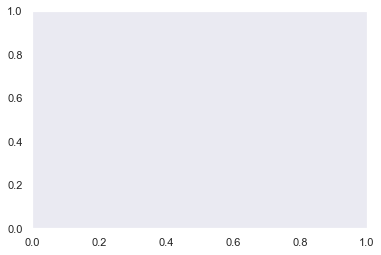

In [34]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with
iris = datasets.load_iris()
X = obs.iloc[:,5:18]
y = obs.iloc[:, -1]
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape



# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
classifier = svm.SVC(kernel='sigmoid', probability=True, random_state='random_state')

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()